In [94]:
import pandas as pd
import numpy as np

from random import sample, randint, shuffle


import os

import heapq
import nltk
import cv2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
# from sklearn.metrics import f1_score
from sklearn import metrics

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

# from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('pinterest_labels.csv')

In [4]:
df_copy = df
df.head()

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/


In [5]:
LOOKUP = set(['male','female','monster','environment'])
new_column = []
for i, row in enumerate(df['labels']):
    new_array = []
    items = row[1:len(row)-1]
    items = items.split(",")
    for item in items:
        new_item = item[1:len(item)-1]
        if new_item in LOOKUP:
            new_array.append(new_item)
    new_column.append(new_array)

In [6]:
print(new_column)

[['male', 'monster'], ['male', 'monster'], ['female', 'environment'], ['monster'], ['monster'], ['monster'], ['monster'], ['male', 'monster'], ['monster', 'male'], ['monster', 'male'], ['female'], ['monster'], ['male', 'environment'], ['female', 'environment'], ['female', 'environment'], ['monster', 'male'], ['female'], ['monster'], ['male', 'environment'], ['monster'], ['monster'], ['monster'], ['male', 'monster'], ['female', 'monster'], ['male', 'monster'], ['male', 'monster'], ['monster', 'male'], ['monster'], ['monster'], ['environment'], ['male'], ['monster'], ['monster'], ['monster'], ['monster', 'male'], ['environment'], [], ['monster'], ['male'], ['environment'], ['monster', 'female', 'environment'], ['female', 'monster'], ['female', 'environment'], ['female', 'environment'], ['monster'], ['female'], ['male', 'monster'], ['female', 'monster'], [], [], ['monster'], ['male', 'environment'], ['female', 'monster'], ['female'], ['environment'], ['female'], ['environment'], ['monster

In [7]:
df['labels_std'] = new_column

In [8]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [9]:
LabelsCount = {'female':0, 'male':0, 'monster':0, 'environment':0}
for row in new_column:
    for item in row:
        LabelsCount[item] += 1
print(LabelsCount)

{'female': 9448, 'male': 8221, 'monster': 10025, 'environment': 7887}


In [10]:
df = df[df['labels_std'].map(len) > 0]

In [11]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [12]:
LabelsCount = {'female':0, 'male':0, 'monster':0, 'environment':0}
for row in new_column:
    for item in row:
        LabelsCount[item] += 1
print(LabelsCount)

{'female': 9448, 'male': 8221, 'monster': 10025, 'environment': 7887}


In [13]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [14]:
df = df.drop(['labels'], axis=1)

In [15]:
df = df.rename(columns={"labels_std": "labels"})

In [16]:
df

,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels
0,2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [17]:
df['hexCode'].nunique()

14164

In [18]:
df

,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels
0,2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [19]:
widthDict = {}
for width in df['imgWidth']:
    if width not in widthDict:
        widthDict[width] = 1
    else:
        widthDict[width] += 1
    
heightDict = {}
for height in df['imgHeight']:
    if height not in heightDict:
        heightDict[height] = 1
    else:
        heightDict[height] += 1

widthDictKeys, widthDictValues = widthDict.keys(), widthDict.values()
heightDictKeys, heightDictValues = heightDict.keys(), heightDict.values()

In [20]:
top_five_imgWidths = heapq.nlargest(5,widthDictValues)
top_five_imgHeights = heapq.nlargest(5,heightDictValues)

print(top_five_imgWidths,top_five_imgHeights)

[1026, 608, 528, 513, 477] [639, 571, 533, 521, 498]


In [21]:
histogramOfTopFiveWidths = []
for value in top_five_imgWidths:
    for key in widthDictKeys:
        if widthDict[key] == value:
            histogramOfTopFiveWidths.append((key, value))
print(histogramOfTopFiveWidths)

[(500, 1026), (600, 608), (1000, 528), (1920, 513), (640, 477)]


In [22]:
histogramOfTopFiveHeights = []
for value in top_five_imgHeights:
    for key in heightDictKeys:
        if heightDict[key] == value:
            histogramOfTopFiveHeights.append((key, value))
print(histogramOfTopFiveHeights)

[(1000, 639), (960, 571), (1600, 533), (800, 521), (1200, 498)]


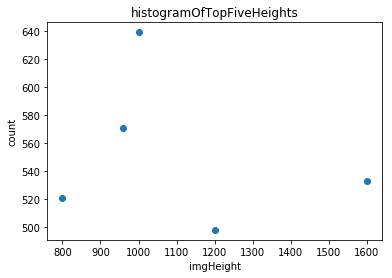

In [23]:
plt.scatter(*zip(*histogramOfTopFiveHeights))
plt.title('histogramOfTopFiveHeights')
plt.xlabel('imgHeight')
plt.ylabel('count')
plt.show()

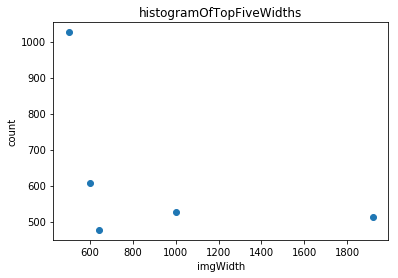

In [24]:
plt.scatter(*zip(*histogramOfTopFiveWidths))
plt.title('histogramOfTopFiveWidths')
plt.xlabel('imgWidth')
plt.ylabel('count')
plt.show()

In [25]:
avgHeight = 0
for height in df['imgHeight']:
    avgHeight += height
avgHeight = avgHeight/len(df['imgHeight'])
print(avgHeight, len(df['imgHeight']))

1043.5123244929798 19230


In [26]:
avgWidth = 0
for width in df['imgWidth']:
    avgWidth += width
avgWidth = avgWidth/len(df['imgWidth'])
print(avgWidth, len(df['imgWidth']))

789.658190327613 19230


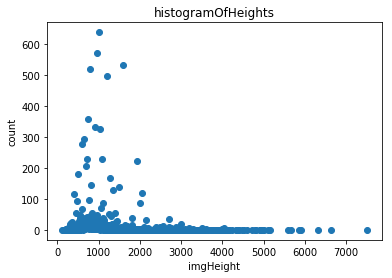

In [27]:
plt.scatter(*zip(*list(heightDict.items())))
plt.title('histogramOfHeights')
plt.xlabel('imgHeight')
plt.ylabel('count')
plt.show()

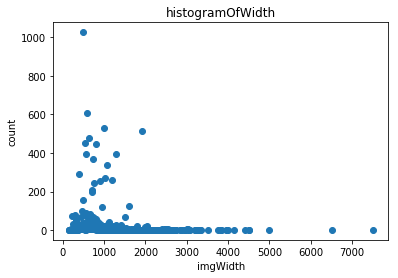

In [28]:
plt.scatter(*zip(*list(widthDict.items())))
plt.title('histogramOfWidth')
plt.xlabel('imgWidth')
plt.ylabel('count')
plt.show()

In [29]:
colorHisto = {}
for color in df['hexCode']:
    if color not in colorHisto:
        colorHisto[color] = 1
    else:
        colorHisto[color] += 1

colorHistoKeys, colorHistoValues = colorHisto.keys(), colorHisto.values()
print(colorHisto)

{'#ffffff': 2265, '#313132': 2, '#2a2118': 2, '#a6aeb9': 2, '#494949': 5, '#567886': 2, '#56747f': 4, '#23212b': 2, '#d6d6d7': 2, '#60454c': 2, '#0c3034': 2, '#d8d8d8': 6, '#676c6f': 3, '#301b1b': 3, '#fef8d4': 23, '#fffefc': 4, '#29285e': 2, '#253117': 2, '#3e403d': 2, '#839f7f': 2, '#5d211b': 2, '#675a51': 3, '#fdfbfc': 2, '#7c7c7c': 7, '#753d23': 2, '#fefdfe': 3, '#a99d8d': 2, '#103232': 2, '#1d1e25': 2, '#c7bbc2': 2, '#282828': 6, '#414141': 6, '#292929': 8, '#ababab': 3, '#efeeea': 7, '#a79da1': 2, '#0b1229': 2, '#27292d': 2, '#6f4a42': 2, '#232323': 3, '#4d3f1f': 2, '#5b583a': 2, '#3e2520': 1, '#403328': 2, '#2c2a28': 2, '#768568': 2, '#b19581': 2, '#6c6650': 2, '#fefefe': 197, '#aba5a0': 2, '#26252b': 2, '#666874': 2, '#384a39': 2, '#515262': 2, '#594b5b': 2, '#c9c28e': 2, '#465159': 2, '#0f4443': 2, '#f8f6e2': 2, '#31613b': 2, '#635e51': 2, '#503c33': 2, '#eca930': 2, '#f3eb7b': 2, '#2f2b1f': 2, '#3c3c24': 2, '#313034': 2, '#6f5b4a': 2, '#202334': 2, '#76654d': 2, '#a09e98': 2,

In [30]:
# plt.scatter(*zip(*list(colorHisto.items())))
# plt.title('histogramOfHexCodes')
# plt.xlabel('hexCode')
# plt.ylabel('count')
# plt.show()

In [31]:
# https://github.com/Sukhrobjon/DS-2.1-ML-Challenges/blob/master/final_project/classifying_movie_genres.ipynb

# create dataframe
all_labels_df = pd.DataFrame({'Label': list(LabelsCount.keys()), 
                              'Count': list(LabelsCount.values())})


all_labels_df

,Label,Count
0,female,9448
1,male,8221
2,monster,10025
3,environment,7887


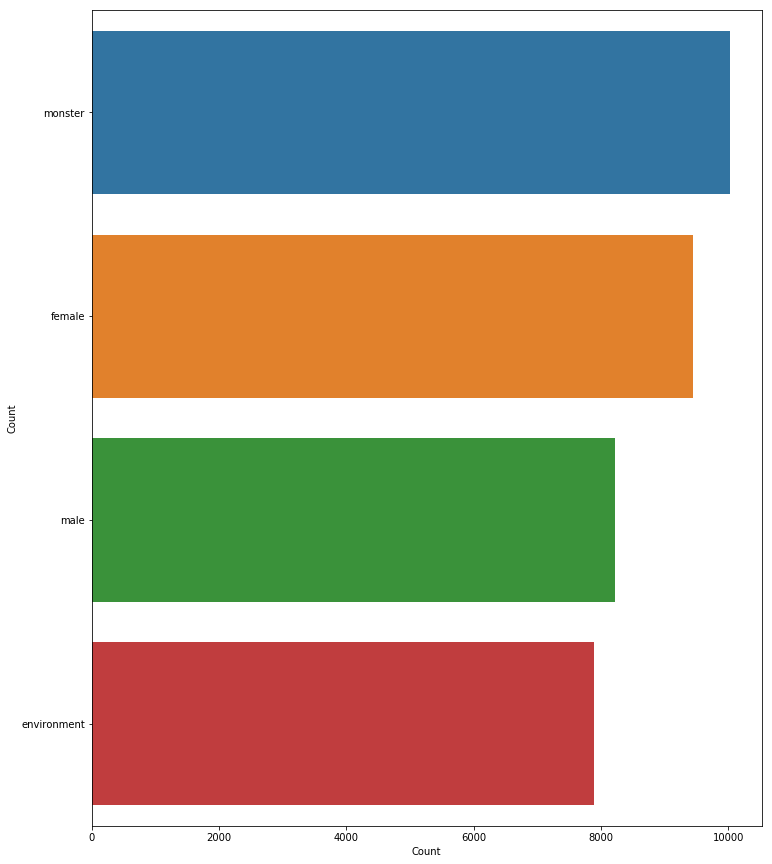

In [32]:
g = all_labels_df.nlargest(columns="Count", n = 4) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Label") 
ax.set(ylabel = 'Count') 
plt.show()

In [33]:
# copying the Description and Genre of a movie

dataset = pd.DataFrame(df[["imgUrl","labels"]])
dataset['key'] = dataset.index
dataset = dataset[['key', 'imgUrl', 'labels']]




data_mlb = MultiLabelBinarizer()

data_mlb.fit(dataset['labels'])


# transform target variable
target = data_mlb.transform(dataset['labels'])

list(data_mlb.classes_)

['environment', 'female', 'male', 'monster']

In [34]:
target

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0],
       ...,
       [0, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 0]])

In [35]:
dataset

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]"
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]"
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster]
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster]
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,[monster]
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,[monster]
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,"[male, monster]"
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,"[monster, male]"
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,"[monster, male]"


In [36]:
# type(dataset)
# datasetMF = dataset[('male' in dataset['labels'] or 'female' in dataset['labels'])]
df_FM = []
for i, j in dataset.iterrows():
    if 'male' in j.labels or 'female' in j.labels:
        df_FM.append(j)

In [37]:
df_FM
df_FM = pd.DataFrame(df_FM)

In [38]:
df_FM # a dataframe of just male and female labels.

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]"
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]"
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,"[male, monster]"
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,"[monster, male]"
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,"[monster, male]"
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,[female]
12,12,https://i.pinimg.com/originals/49/79/83/497983...,"[male, environment]"
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,"[female, environment]"
14,14,https://i.pinimg.com/originals/87/39/19/873919...,"[female, environment]"


In [39]:
# LOOKUP = set(['male','female'])
for i, j in df_FM.iterrows():
    male = False
    female = False
    for k, label in enumerate(j.labels):
        if label =='monster' or label == 'environment':
            j.labels.pop(k)

In [40]:
df_FM

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,[male]
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,[male]
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,[female]
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,[male]
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,[male]
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,[male]
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,[female]
12,12,https://i.pinimg.com/originals/49/79/83/497983...,[male]
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,[female]
14,14,https://i.pinimg.com/originals/87/39/19/873919...,[female]


In [41]:
LabelsCount = {'female':0, 'male':0, 'monster':0, 'environment':0}
for i, j in df_FM.iterrows():
    for label in j.labels:
        LabelsCount[label] += 1
print(LabelsCount)

{'female': 9448, 'male': 8221, 'monster': 174, 'environment': 2773}


In [42]:
# removing rows with both male and female labels
# (mostly groups though some single figures were characterized as both male and female)
r, c = df_FM.shape
print(r)
df_FM = df_FM[df_FM['labels'].map(len) < 2]
# df_FM = df_FM[len(df_FM['labels']) == 1]
# for i, j in df_FM.iterrows():
#     if len(j.labels) > 1:
#         df_FM.drop(i)
r, c = df_FM.shape
print(r)     

16981
13681


In [43]:
df_FM

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,[male]
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,[male]
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,[female]
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,[male]
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,[male]
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,[male]
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,[female]
12,12,https://i.pinimg.com/originals/49/79/83/497983...,[male]
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,[female]
14,14,https://i.pinimg.com/originals/87/39/19/873919...,[female]


In [44]:
unpacked_Labels = []
for i, j in df_FM.iterrows():
    unpacked_Labels.append(*j.labels)

In [45]:
df_FM['labels'] = unpacked_Labels
df_FM

/Users/jamesmccrory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,male
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,male
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,female
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,male
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,male
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,male
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,female
12,12,https://i.pinimg.com/originals/49/79/83/497983...,male
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,female
14,14,https://i.pinimg.com/originals/87/39/19/873919...,female


In [46]:
df_FM = df_FM.sort_values(by=['labels'])

In [47]:
new_indices = []
count = -1
count_male = None
for i, j in df_FM.iterrows():
    count +=1
    new_indices.append(count)
    if j.labels == 'male' and count_male == None:
        count_male = count

df_FM['index'] = new_indices
print(count, count_male)

female_DF = df_FM.iloc[:count_male]
male_DF = df_FM.iloc[count_male:]

print(female_DF.tail())
male_DF.head()

13680 7648
         key                                             imgUrl  labels  index
4898    4898  https://i.pinimg.com/originals/bc/02/bf/bc02bf...  female   7643
6694    6694  https://i.pinimg.com/originals/b3/b2/42/b3b242...  female   7644
19367  19367  https://i.pinimg.com/originals/58/92/e0/5892e0...  female   7645
4971    4971  https://i.pinimg.com/originals/5c/88/2a/5c882a...  female   7646
4324    4324  https://i.pinimg.com/originals/e2/37/82/e23782...  female   7647


,key,imgUrl,labels,index
22865,22865,https://i.pinimg.com/originals/80/9d/05/809d05...,male,7648
19733,19733,https://i.pinimg.com/originals/6a/3e/18/6a3e18...,male,7649
16649,16649,https://i.pinimg.com/originals/9e/7f/b0/9e7fb0...,male,7650
22935,22935,https://i.pinimg.com/originals/0a/a9/75/0aa975...,male,7651
15942,15942,https://i.pinimg.com/originals/db/86/2f/db862f...,male,7652


In [48]:
# female_DF.to_csv(r'/Users/jamesmccrory/Documents/dev/pinterest_dataset/images/FEMALE_urls_labels.csv', index = None, header=True)
# male_DF.to_csv(r'/Users/jamesmccrory/Documents/dev/pinterest_dataset/images/MALE_urls_labels.csv', index = None, header=True)

In [49]:
# commenting the below cell out and creating a new .csv from the results:


# pixel_data = []

# for i,j in dataset.iterrows(): 
#     im = cv2.imread("/Users/jamesmccrory/Documents/dev/pinterest_dataset/images/" + str(i) + ".png",0)
#     pixel_data.append(im)

# dataset['pixel_data'] = pixel_data  

In [50]:
print(male_DF.describe())
print(female_DF.describe())

                key         index
count   6033.000000   6033.000000
mean   11033.050224  10664.000000
std     6702.873902   1741.721419
min        0.000000   7648.000000
25%     5077.000000   9156.000000
50%    10780.000000  10664.000000
75%    17005.000000  12172.000000
max    22968.000000  13680.000000
                key        index
count   7648.000000  7648.000000
mean   11488.537918  3823.500000
std     6550.065865  2207.931762
min        2.000000     0.000000
25%     6199.750000  1911.750000
50%    11382.000000  3823.500000
75%    17186.250000  5735.250000
max    22965.000000  7647.000000


In [51]:
# dataset.to_csv(r'/Users/jamesmccrory/Documents/dev/pinterest_dataset/urls_labels_pixeldata.csv', index = None, header=True)

In [52]:
male_DF = male_DF.sort_values(by=['key'])
female_DF = female_DF.sort_values(by=['key'])

In [53]:
print(male_DF[:10])
print(female_DF[:10])

    key                                             imgUrl labels  index
0     0  https://i.pinimg.com/originals/21/18/03/211803...   male   9485
1     1  https://i.pinimg.com/originals/ff/24/63/ff2463...   male  10891
7     7  https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...   male  10890
8     8  https://i.pinimg.com/originals/cd/13/75/cd1375...   male  10889
9     9  https://i.pinimg.com/originals/a9/91/50/a99150...   male  10888
12   12  https://i.pinimg.com/originals/49/79/83/497983...   male  10887
15   15  https://i.pinimg.com/originals/72/97/e4/7297e4...   male  10886
18   18  https://i.pinimg.com/originals/2b/20/5f/2b205f...   male  10885
22   22  https://i.pinimg.com/originals/d4/0f/bd/d40fbd...   male  10884
24   24  https://i.pinimg.com/originals/da/dd/d0/daddd0...   male  10883
    key                                             imgUrl  labels  index
2     2  https://i.pinimg.com/originals/d5/ce/97/d5ce97...  female   5614
10   10  https://i.pinimg.com/originals/f7/39/14/

In [54]:
male_DF = male_DF.drop(['index'], axis=1)
female_DF = female_DF.drop(['index'], axis=1)

In [55]:
female_DF

,key,imgUrl,labels
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,female
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,female
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,female
14,14,https://i.pinimg.com/originals/87/39/19/873919...,female
16,16,https://i.pinimg.com/originals/4d/46/38/4d4638...,female
23,23,https://i.pinimg.com/originals/00/27/09/002709...,female
40,40,https://i.pinimg.com/originals/fa/e4/10/fae410...,female
41,41,https://i.pinimg.com/originals/61/70/8f/61708f...,female
42,42,https://i.pinimg.com/originals/1e/6c/d4/1e6cd4...,female
43,43,https://i.pinimg.com/originals/31/6a/93/316a93...,female


In [56]:
df_FM

,key,imgUrl,labels,index
11131,11131,https://i.pinimg.com/originals/99/64/9c/99649c...,female,0
9690,9690,https://i.pinimg.com/originals/ac/b7/e3/acb7e3...,female,1
9686,9686,https://i.pinimg.com/originals/74/16/39/741639...,female,2
9684,9684,https://i.pinimg.com/originals/a7/93/07/a79307...,female,3
9682,9682,https://i.pinimg.com/originals/05/f3/61/05f361...,female,4
9681,9681,https://i.pinimg.com/originals/5a/e1/01/5ae101...,female,5
9678,9678,https://i.pinimg.com/originals/c9/81/ce/c981ce...,female,6
9677,9677,https://i.pinimg.com/originals/01/3a/b5/013ab5...,female,7
18120,18120,https://i.pinimg.com/originals/48/03/98/480398...,female,8
18121,18121,https://i.pinimg.com/originals/3f/fd/fe/3ffdfe...,female,9


In [57]:
df_FM = df_FM.drop(['index'], axis=1)
df_FM = df_FM.sort_values(by=['key'])
df_FM

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,male
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,male
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,female
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,male
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,male
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,male
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,female
12,12,https://i.pinimg.com/originals/49/79/83/497983...,male
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,female
14,14,https://i.pinimg.com/originals/87/39/19/873919...,female


In [58]:
y = []
for i, j in df_FM.iterrows():
    if j.labels == 'male':
        y.append(1)
    else:
        y.append(0)

In [59]:
df_FM['y'] = y

In [60]:
count = - 1
index = []
for i, j in df_FM.iterrows():
    count+=1
    index.append(count)


index
    

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [61]:
df_FM['index'] = index

In [62]:
df_FM

,key,imgUrl,labels,y,index
0,0,https://i.pinimg.com/originals/21/18/03/211803...,male,1,0
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,male,1,1
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,female,0,2
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,male,1,3
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,male,1,4
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,male,1,5
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,female,0,6
12,12,https://i.pinimg.com/originals/49/79/83/497983...,male,1,7
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,female,0,8
14,14,https://i.pinimg.com/originals/87/39/19/873919...,female,0,9


In [63]:
df_FM = df_FM.drop(['key'], axis=1)

In [64]:
df_FM = df_FM[['index','imgUrl','labels','y']]
df_FM.describe()

,index,y
count,13681.000000,13681.000000
mean,6840.000000,0.440977
std,3949.508851,0.496522
min,0.000000,0.000000
25%,3420.000000,0.000000
50%,6840.000000,0.000000
75%,10260.000000,1.000000
max,13680.000000,1.000000


In [65]:
# df_FM.to_csv(r'/Users/jamesmccrory/Documents/dev/pinterest_dataset/FM_urls_labels.csv', index = None, header=True)

In [66]:
# training and validation set
X_train_name, X_test_name, y_train_value, y_test_value = train_test_split(df_FM["index"], 
                                                    y, 
                                                    train_size=0.75, 
                                                    test_size=0.25)

In [67]:
# https://github.com/erykml/mario_vs_wario/blob/master/mario_vs_wario.ipynb
def img_to_1d_greyscale(img_path):
    # function for loading, resizing and converting an image into greyscale
    # used for logistic regression
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     print(img_path,img)
    
#     img = cv2.resize(img, size)
    return(pd.Series(img.flatten()))

In [68]:
size = (200, 200)

# defining empty containers
X_train = pd.DataFrame(np.zeros((len(X_train_name), size[0] * size[1])))
X_test = pd.DataFrame(np.zeros((len(X_test_name), size[0] * size[1])))

In [69]:
X_train_name.iloc[0]

4832

In [71]:

files = os.listdir('images/male_female_resized')
files.sort()

for i in range(len(X_train_name)):
    X_train.iloc[i, :] = img_to_1d_greyscale('images/male_female_resized/' + str(X_train_name.iloc[i]) + '.png') / 255

for i in range(len(X_test_name)):
    X_test.iloc[i, :] = img_to_1d_greyscale('images/male_female_resized/' + str(X_test_name.iloc[i]) + '.png') / 255

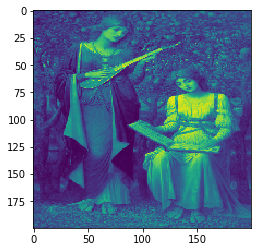

In [72]:
# example image
plt.imshow(np.reshape(X_train.iloc[0, ].values, size))

In [104]:
logreg_classifier = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [105]:
logreg_classifier.fit(X_train, y_train_value)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
logreg_pred = logreg_classifier.predict(X_test)

In [123]:
# https://github.com/erykml/mario_vs_wario/blob/master/mario_vs_wario.ipynb
def pretty_cm(y_pred, y_truth, labels):
    # pretty implementation of a confusion matrix
    cm = metrics.confusion_matrix(y_truth, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    # labels, title and ticks
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Accuracy: {0}'.format(metrics.accuracy_score(y_truth, y_pred)), size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

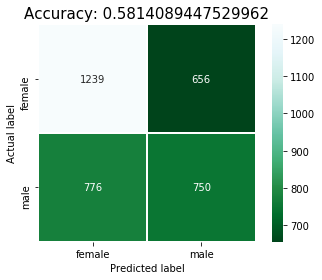

In [124]:
pretty_cm(logreg_pred, y_test_value, ['female', 'male'])

In [125]:
def evaluation_indices(y_pred, y_test):
    # function for getting correctly and incorrectly classified indices
    index = 0
    correctly_classified_indices = []
    misclassified_indices = []
    for label, predict in zip(y_test, y_pred):
        if label != predict: 
            misclassified_indices.append(index)
        else:
            correctly_classified_indices.append(index)
        index +=1
    return (correctly_classified_indices, misclassified_indices)

In [126]:
correctly_classified_indices, misclassified_indices = evaluation_indices(logreg_pred, y_test_value)

In [127]:

# inspecting class labels for future reference 
labels_index = { 0 : "female", 1 : "male" }

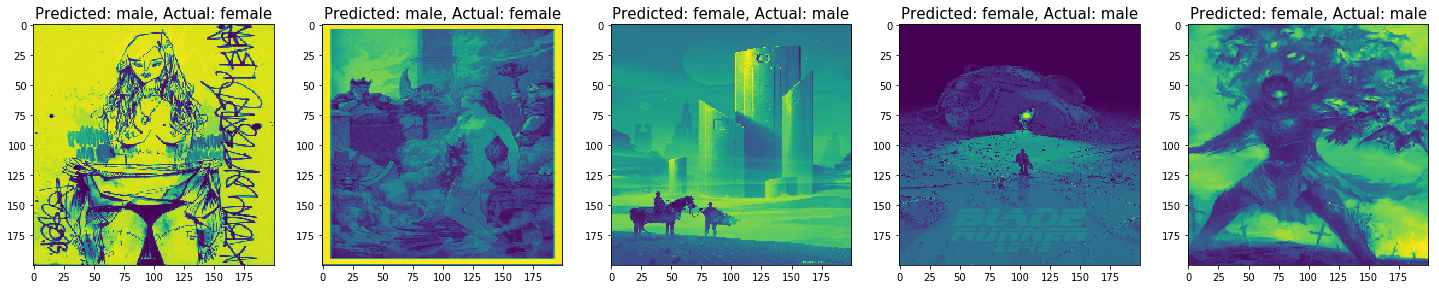

In [128]:
plt.figure(figsize=(25,5))
shuffle(misclassified_indices)

for plot_index, bad_index in enumerate(misclassified_indices[0:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(np.reshape(X_test.iloc[bad_index, :].values, size))
    plt.title('Predicted: {}, Actual: {}'.format(labels_index[logreg_pred[bad_index]], 
                                                 labels_index[y_test_value[bad_index]]), fontsize = 15)

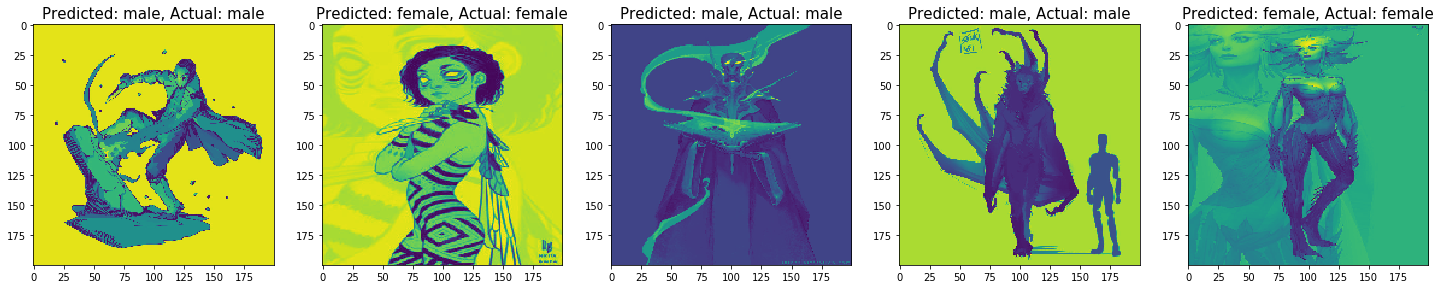

In [129]:
plt.figure(figsize=(25,5))
shuffle(correctly_classified_indices)

for plot_index, good_index in enumerate(correctly_classified_indices[0:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(np.reshape(X_test.iloc[good_index, :].values, size))
    plt.title('Predicted: {}, Actual: {}'.format(labels_index[logreg_pred[good_index]], 
                                                 labels_index[y_test_value[good_index]]), fontsize = 15)